First I need to import libaries, I need a libary to make gassuion filters cv and np

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage as spi
from skimage import img_as_float

# taking the fspecial source code from MATLAB and converted to work in python
# works almost the same ish
# https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
def matlab_style_gauss2D(shape,sigma):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [189]:
def pad_like(img,sz):
    """
    Pads img with zeros so that it is the same size as the given size sz, while also keeping somewhat in the center
    """
    wd,ht = np.shape(img) #128,128
    ww,hh = sz   #280,281
    result = np.zeros(sz) #280,281
    
    #finding the center offset
    xx = (ww-wd) // 2  #divide by 2 and floor
    yy = (hh-ht) // 2 
    
    #insert image into result
    result[xx:xx+wd,yy:yy+ht] = img
    
    return result

In [190]:
#now defining the function that will create the hybird image
def hybirdImg(im1, im2, sigma, alpha):
    """
    inputs:
    im1 = image 1 which will take the high frequencies 
    im2 = image 2 which will take the low frequencies
    sigma = standard deviation of the gaussian blur
    alpha = the blend ratio
    """
    
    sz1 = np.shape(im1) #128x128
    sz2 = np.shape(im2) #280x281
    sz_hybird = (np.max([sz1[0],sz2[0]]) , np.max([sz1[1],sz2[1]])) #holds size of final image
    print(sz_hybird)
    print(np.shape(im1))

    #resize the images to fit the hybird image
    img1 = pad_like(im1,sz_hybird)
    img2 = pad_like(im2,sz_hybird)
    
    h = matlab_style_gauss2D((20,20),sigma) #h is the filter kernal
    
    dummy_var = spi.convolve(img1,h) #low pass of image 1
    
    high_pass = np.subtract(img1,dummy_var) #original image - low pass image  = highpass
    
    low_pass = spi.convolve(img2,h)
    
    hybird_image = alpha*(low_pass) + (1-alpha)*high_pass;
    return hybird_image
 

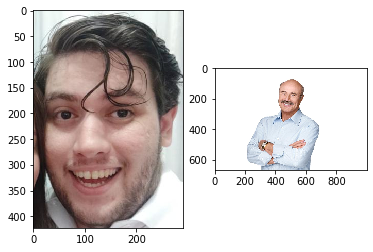

In [114]:
#path1 = r'C:\Users\victo\Pictures\DONT_READ_MY_PATH\cygs.png'
#path2 = r'C:\Users\victo\Pictures\DONT_READ_MY_PATH\pepewut.png'
#path2 = r'C:\Users\victo\Documents\ee\Comp Vision\github_upload\VICTOR_YUAN_Homework2\cat.bmp'
#path2 = r'C:\Users\victo\Documents\ee\Comp Vision\github_upload\VICTOR_YUAN_Homework2\dog.bmp'
path1 = r'C:\Users\victo\Pictures\discord pictures\doc.png'
path2 = r'C:\Users\victo\Pictures\discord pictures\drphil.png'
#read images in, cv2 reads in as BGR format
img1_bgr = cv2.imread(path1)
img2_bgr = cv2.imread(path2)

img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)

img1 = img_as_float(img1)
img2 = img_as_float(img2)
#plot
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img1) #image 1
plt.subplot(1,2,2)
plt.imshow(img2) #image 2

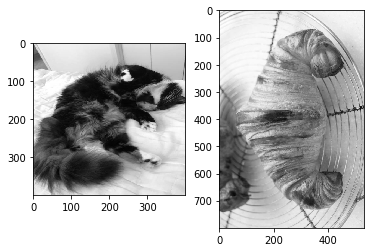

In [34]:
#convert to greyscale for now, keep using BGR since cv2 perference

img1_gray = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)

#sz = np.shape(img1_gray)
img1_gray = cv2.resize(img1_gray,(400,400))
#plot
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img1_gray, cmap='gray') #image 1
plt.subplot(1,2,2)
plt.imshow(img2_gray, cmap='gray') #image 2

In [35]:
np.shape(img2_gray)

(800, 533)

In [5]:
bird = hybirdImg(img1_gray, img2_gray, sigma=5, alpha=0.5)
plt.figure()
plt.imshow(bird, cmap = 'gray')

NameError: name 'hybirdImg' is not defined

In [122]:
class images:
    def __init__(self, img1, img2, sigma, alpha):
        self.r1 = img1[:,:,0]
        self.g1 = img1[:,:,1]
        self.b1 = img1[:,:,2]
        
        self.r2 = img2[:,:,0]
        self.g2 = img2[:,:,1]
        self.b2 = img2[:,:,2]
        self.sigma = sigma
        self.alpha = alpha
        self.beta = 1-alpha
        
    def hybirdImg(self, im1, im2, sigma, alpha, beta):
        """
        inputs:
        im1 = im1 will take the high frequencies 
        im2 = im2 will take the low frequencies
        sigma = standard deviation of the gaussian blur
        alpha = the blend ratio
        """
        sz1 = np.shape(im1) 
        sz2 = np.shape(im2) 
        sz_hybird = (np.max([sz1[0],sz2[0]]) , np.max([sz1[1],sz2[1]])) #holds size of final image

        #resize the images to fit the hybird image
        img1 = self.pad_like(im1,sz_hybird)
        img2 = self.pad_like(im2,sz_hybird)
    
        h = matlab_style_gauss2D((20,20),sigma) #h is the filter kernal
    
        dummy_var = spi.convolve(img1,h) #low pass of image 1
    
        high_pass = np.subtract(img1,dummy_var) #original image - low pass image  = highpass
    
        low_pass = spi.convolve(img2,h)
    
        hybird_image = alpha*(low_pass) + (beta)*high_pass;
        return hybird_image
    
    def pad_like(self,img,sz):
        """
        Pads img with zeros so that it is the same size as the given size sz, while also keeping somewhat in the center
        """
        wd,ht = np.shape(img) #128,128
        ww,hh = sz   #280,281
        result = np.zeros(sz) #280,281
    
        #finding the center offset
        xx = (ww-wd) // 2  #divide by 2 and floor
        yy = (hh-ht) // 2 
    
        #insert image into result
        result[xx:xx+wd,yy:yy+ht] = img
        return result

    def hybird(self):
        red_channel = self.hybirdImg(self.r1,self.r2,self.sigma,self.alpha,self.beta)
        green_channel = self.hybirdImg(self.g1,self.g2,self.sigma,self.alpha,self.beta)
        blue_channel = self.hybirdImg(self.b1,self.b2,self.sigma,self.alpha,self.beta)
        
        result = cv2.merge([blue_channel,green_channel,red_channel])
        return result
         

In [123]:
img1 = cv2.resize(img1,(350,350))
img2 = cv2.resize(img2,(450,450))



In [124]:
pepega = images(img1,img2,sigma = 5, alpha=0.5)

In [126]:
ppga = pepega.hybird()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


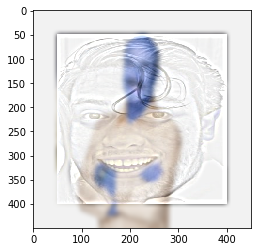

In [127]:
ppga = ppga*1.9
plt.figure()

plt.imshow(ppga)

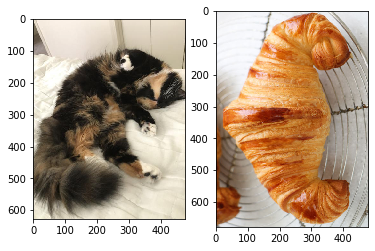

In [65]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img1) #image 1
plt.subplot(1,2,2)
plt.imshow(img2) #image 2

In [44]:
np.max(ppga)

2.021320922633511

In [53]:
np.min(ppga)

-0.05666539001265535

In [72]:
np.shape(img2)

(425, 425, 3)